## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Task1_Dataset.csv')
df2=pd.read_csv('Task2_Dataset.csv')

In [3]:
column_to_merge=df1[['Weather_conditions']]

In [4]:
df2=pd.concat([df2,column_to_merge], axis=1)

In [5]:
df2

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Weather_conditions
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,Normal
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,Normal
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,Normal
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,Normal
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,Normal
...,...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473,NaN
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955,NaN
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438,NaN
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218,NaN


In [6]:
df2.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive', 'Weather_conditions'],
      dtype='object')

# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [7]:
df2.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
 9   Weather_conditions   12316 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.1+ MB


In [9]:
df2['Datetime']=pd.to_datetime(df2['Datetime'])

In [10]:
df2['year']=df2['Datetime'].dt.year
df2['month']=df2['Datetime'].dt.month
df2['day']=df2['Datetime'].dt.day
df2['minute']=df2['Datetime'].dt.minute
df2['second']=df2['Datetime'].dt.second

In [11]:
df2.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,Weather_conditions,year,month,day,minute,second
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617,Normal,2023,7,7,1,30
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629,Normal,2023,7,7,1,30
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834,Normal,2023,7,7,46,30
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917,Normal,2023,7,7,16,30
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246,Normal,2023,7,7,1,30


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
 9   Weather_conditions   12316 non-null  object        
 10  year                 66639 non-null  int32         
 11  month                66639 non-null  int32         
 12  day                  66639 non-null  int32         
 13  minute               66639 non-

### Identify and analyze patterns in the data.

In [13]:
print("\nCity Value Counts:")
df2['City'].value_counts() #Doha and Riyadh are the most mensioned cities in the dataset with 8692 times.


City Value Counts:


City
Doha        8692
Riyadh      8692
Kuwait      8691
Cairo       8690
Dubai       8690
Abudhabi    3864
Al-ain      3864
Dammam      3864
Jeddah      3864
Mecca       3864
Medina      3864
Name: count, dtype: int64

In [14]:
df2['City'].nunique() # there are 11 cities ....

11

In [15]:
df2['City'].unique() #which are ....

array(['Abudhabi', 'Al-ain', 'Cairo', 'Dammam', 'Doha', 'Dubai', 'Jeddah',
       'Kuwait', 'Mecca', 'Medina', 'Riyadh'], dtype=object)

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

<Axes: xlabel='month'>

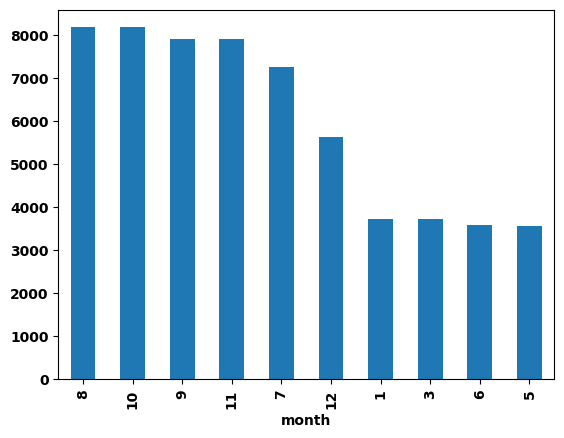

In [16]:
df2['month'].value_counts().head(10).plot.bar()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


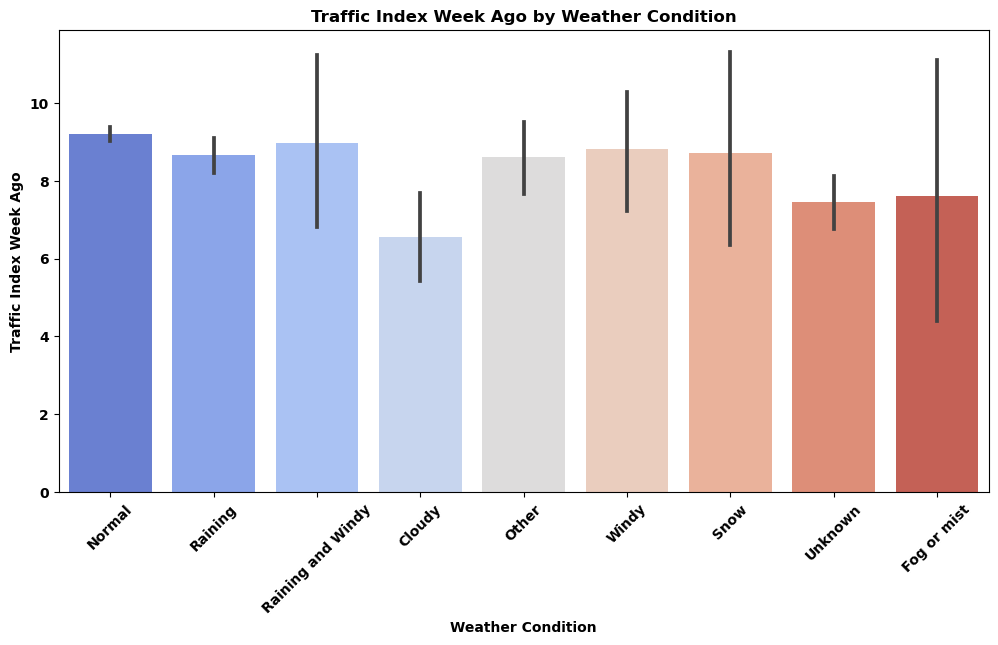

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather_conditions', y='TrafficIndexWeekAgo', data=df2, palette='coolwarm')
plt.title('Traffic Index Week Ago by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Index Week Ago')
plt.xticks(rotation=45)
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


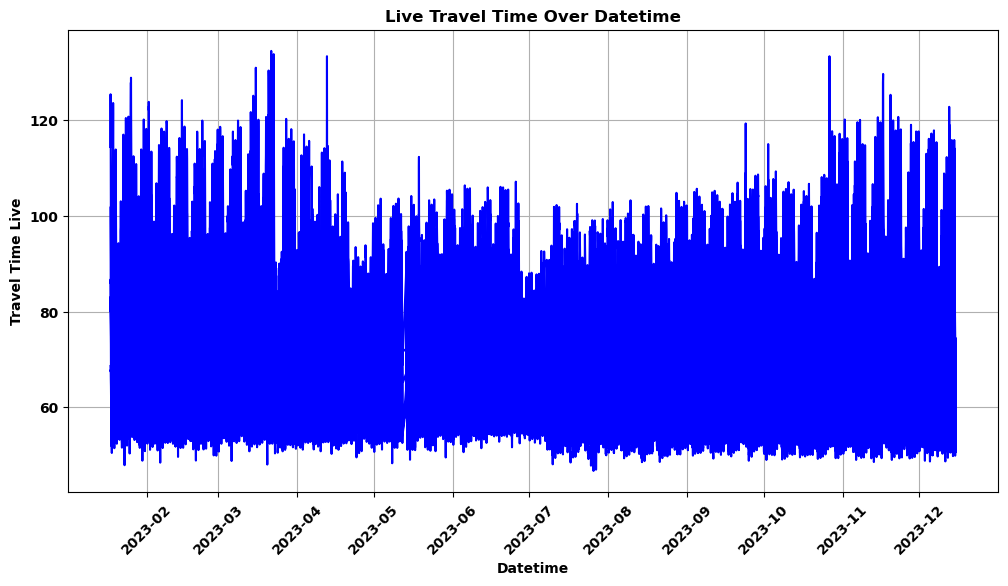

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df2['Datetime'], df2['TravelTimeLive'], color='b', linestyle='-')
plt.title('Live Travel Time Over Datetime')
plt.xlabel('Datetime')
plt.ylabel('Travel Time Live')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

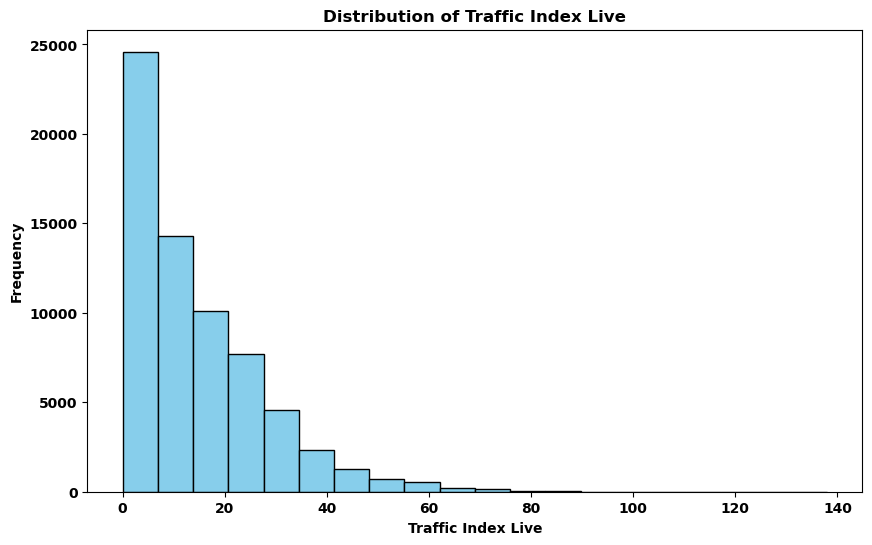

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df2['TrafficIndexLive'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()

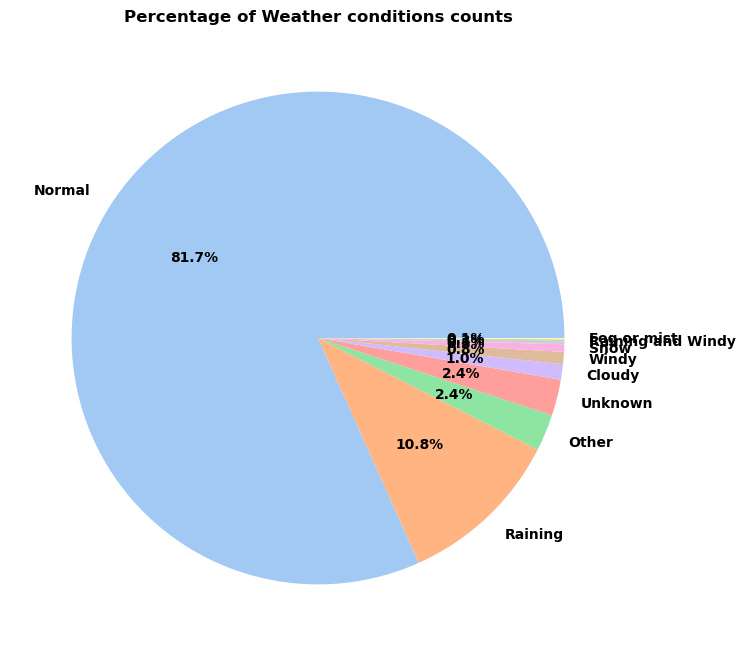

In [20]:
plt.figure(figsize=(8, 8))
Weather_conditions_counts = df2['Weather_conditions'].value_counts()
plt.pie(Weather_conditions_counts, labels=Weather_conditions_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Percentage of Weather conditions counts')
plt.show()

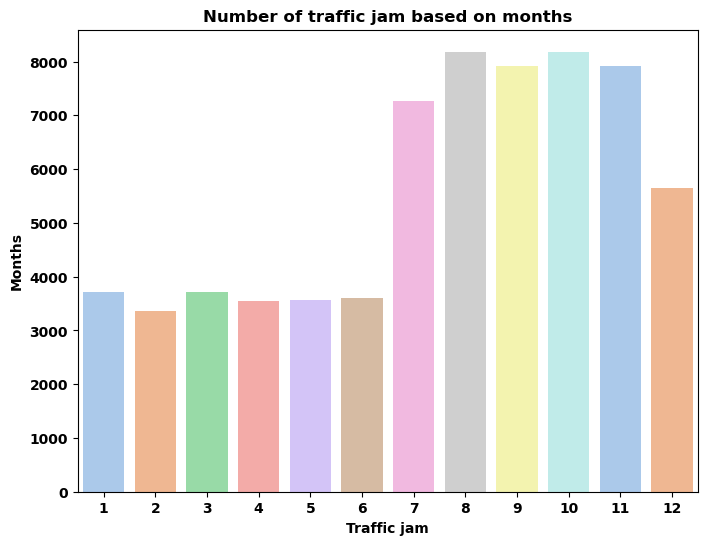

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=df2, palette='pastel')
plt.title('Number of traffic jam based on months')
plt.xlabel('Traffic jam')
plt.ylabel('Months')
plt.show()

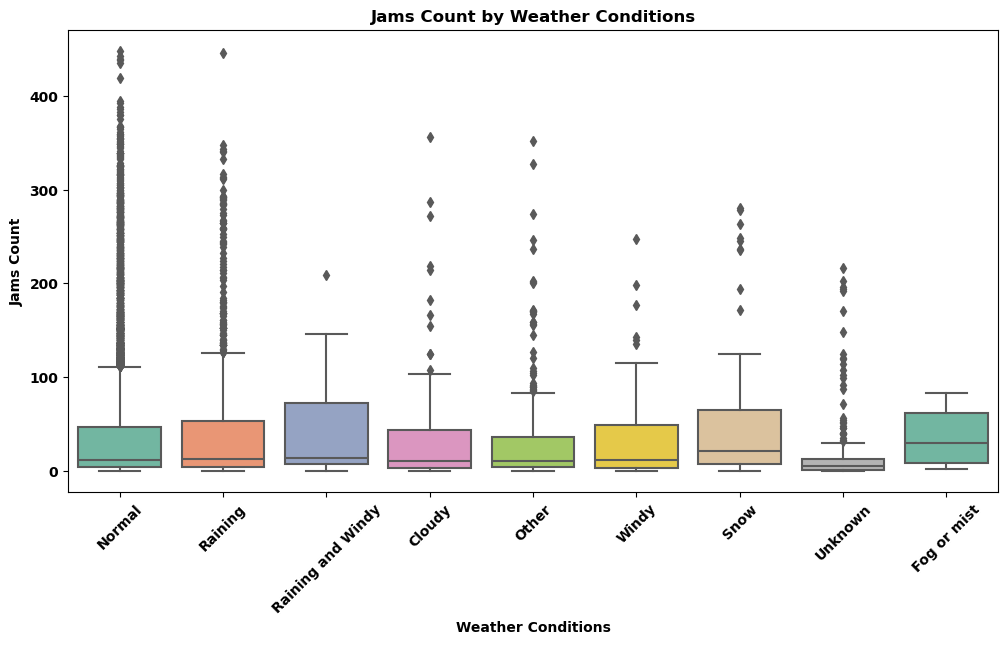

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_conditions', y='JamsCount', data=df2, palette='Set2')
plt.title('Jams Count by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Jams Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
data_numeric=df2[['Datetime','TrafficIndexLive','JamsCount','JamsLength','JamsDelay','TrafficIndexWeekAgo','TravelTimeHistoric','TravelTimeLive']]
data_numeric
correlation_matrix=data_numeric.corr()
correlation_matrix

,Datetime,TrafficIndexLive,JamsCount,JamsLength,JamsDelay,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
Datetime,1.000000,-0.089629,-0.120351,-0.116014,-0.112610,-0.096328,-0.130618,-0.106558
TrafficIndexLive,-0.089629,1.000000,0.876216,0.866799,0.861349,0.903282,0.331072,0.642326
JamsCount,-0.120351,0.876216,1.000000,0.952762,0.982459,0.806545,0.305166,0.566874
JamsLength,-0.116014,0.866799,0.952762,1.000000,0.962679,0.787548,0.306312,0.569065
JamsDelay,-0.112610,0.861349,0.982459,0.962679,1.000000,0.775028,0.303733,0.571188
TrafficIndexWeekAgo,-0.096328,0.903282,0.806545,0.787548,0.775028,1.000000,0.327349,0.573365
TravelTimeHistoric,-0.130618,0.331072,0.305166,0.306312,0.303733,0.327349,1.000000,0.892562
TravelTimeLive,-0.106558,0.642326,0.566874,0.569065,0.571188,0.573365,0.892562,1.000000


<Axes: >

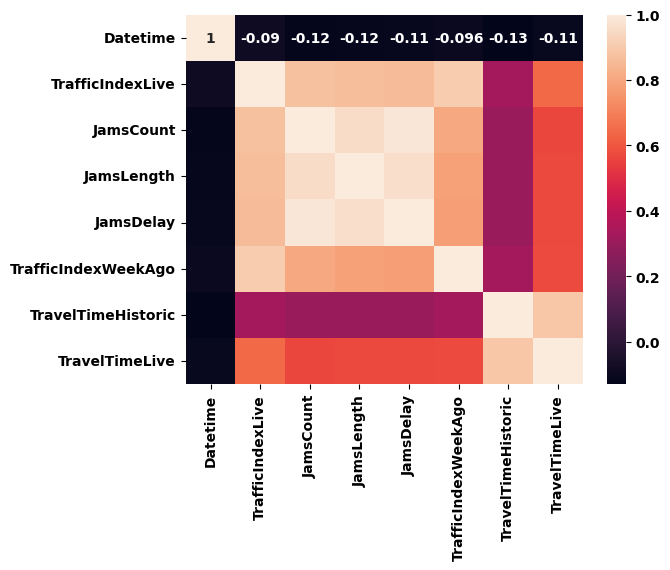

In [26]:
sns.heatmap(correlation_matrix, annot=True)

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.Draw conclusions based on the patterns observed in the data<h3/>

- There are 11 cities which are 'Abudhabi', 'Al-ain', 'Cairo', 'Dammam', 'Doha', 'Dubai', 'Jeddah',
       'Kuwait', 'Mecca', 'Medina', 'Riyadh'
- Doha and Riyadh are the most mensioned cities in the dataset with 8692 times.
- 81.7% of the data were recorded on a normal wheather condition, while 10% were recorded on a rainy day.
- Number of traffic jam were the highest in months 8,10, whereas feburary recorded the least traffic jam.
- The distribution of Traffic Index Live is right-skewed
- Most traffic jams happened in a normal whethear condition
- The traffic travel index week ago was the lowest in a cloudy wheather condition
-  Date is negatively correlated with TrafficIndexLive','JamsCount','JamsLength','JamsDelay','TrafficIndexWeekAgo','TravelTimeHistoric','TravelTimeLive'